# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['vila',
 'sao joao da barra',
 'hambantota',
 'carutapera',
 'okha',
 'hobart',
 'pisco',
 'suchitlan',
 'barrow',
 'vaini',
 'vigrestad',
 'punta arenas',
 'marathon',
 'norman wells',
 'ushuaia',
 'busselton',
 'vanavara',
 'kapaa',
 'rikitea',
 'sola',
 'taolanaro',
 'saldanha',
 'trairi',
 'bluff',
 'geraldton',
 'butaritari',
 'albany',
 'cranbrook',
 'chaoyang',
 'hermanus',
 'qaanaaq',
 'vostok',
 'port hedland',
 'dwarka',
 'pattani',
 'cuamba',
 'narok',
 'san pedro',
 'port hardy',
 'talnakh',
 'ulaanbaatar',
 'temiscaming',
 'south lake tahoe',
 'pangnirtung',
 'inuvik',
 'upernavik',
 'draguignan',
 'chokurdakh',
 'hilo',
 'meulaboh',
 'dingle',
 'hithadhoo',
 'thinadhoo',
 'alice springs',
 'atuona',
 'kalemie',
 'miraflores',
 'magan',
 'avarua',
 'namibe',
 'quatre cocos',
 'mataura',
 'plouzane',
 'bur gabo',
 'amapa',
 'duncan',
 'sitka',
 'kavaratti',
 'burpengary',
 'kasur',
 'victoria',
 'awjilah',
 'ixtapa',
 'illoqqortoormiut',
 'nandi',
 'mus',
 'henties bay',
 

In [4]:
# create lists to store weather data

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print ("Beginning Data Retrieval")
print ("-----------------------------")

# loop through cities using try-except statements

for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        query_url = url + "appid=" + api_key + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_name.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        wind_speed.append(weather_json["wind"]["speed"])
        city_record = weather_json["name"]
        print(f"Processing Record {record} | {city_record}")
        record = record + 1
    except:
        print("City not found. Skipping...")

print ("-----------------------------")
print ("Data Retrieval Complete")
print ("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | Vila
Processing Record 2 | Sao Joao da Barra
Processing Record 3 | Hambantota
Processing Record 4 | Carutapera
Processing Record 5 | Okha
Processing Record 6 | Hobart
Processing Record 7 | Pisco
Processing Record 8 | Suchitlan
Processing Record 9 | Barrow
Processing Record 10 | Vaini
Processing Record 11 | Vigrestad
Processing Record 12 | Punta Arenas
Processing Record 13 | Marathon
Processing Record 14 | Norman Wells
Processing Record 15 | Ushuaia
Processing Record 16 | Busselton
Processing Record 17 | Vanavara
Processing Record 18 | Kapaa
Processing Record 19 | Rikitea
Processing Record 20 | Sola
City not found. Skipping...
Processing Record 21 | Saldanha
Processing Record 22 | Trairi
Processing Record 23 | Bluff
Processing Record 24 | Geraldton
Processing Record 25 | Butaritari
Processing Record 26 | Albany
Processing Record 27 | Cranbrook
Processing Record 28 | Chaoyang
Processing Record 29 | Hermanus
Proc

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
# store data in a dictionary
weather_data = {
    "City" : city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed": wind_speed
}

# convert dictionary into a data frame
weather_data_df = pd.DataFrame(weather_data)

# convert Max Temp from Kelvin to Fahrenheit
def kelv_to_fah(x):
    x = 32 + ((x - 273) * (5.0/9.0))
    return format(x, '.2f')

weather_data_df["Max Temp"] = weather_data_df["Max Temp"].apply(kelv_to_fah)

# save to CSV file
weather_data_df.to_csv('WeatherPy_Data.csv')

In [23]:
weather_data_df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [31]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vila,0,IT,1577760354,100,45.18,8.40,33.01,1.50
1,Sao Joao da Barra,0,BR,1577760217,87,-21.64,-41.05,45.58,3.49
2,Hambantota,90,LK,1577760354,100,6.12,81.12,44.31,1.00
3,Carutapera,100,BR,1577760354,82,-1.20,-46.02,47.26,7.05
4,Okha,100,RU,1577760354,92,53.59,142.95,22.41,8.95


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

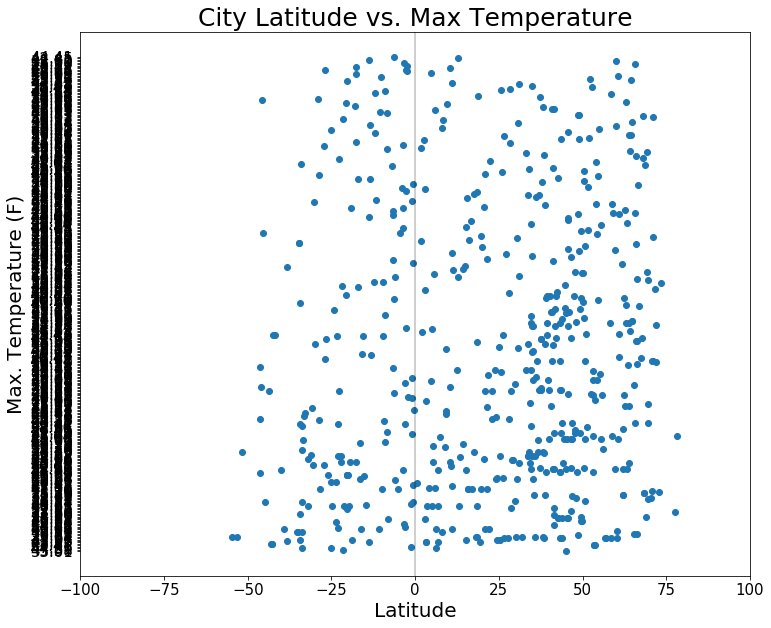

In [32]:
# create scatter plot

plt.title("City Latitude vs. Max Temperature", fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Max. Temperature (F)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)
plt.axvline(0, color = 'black', alpha = .25, label='Equator')

plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o")

plt.savefig("Latitude_vs_Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

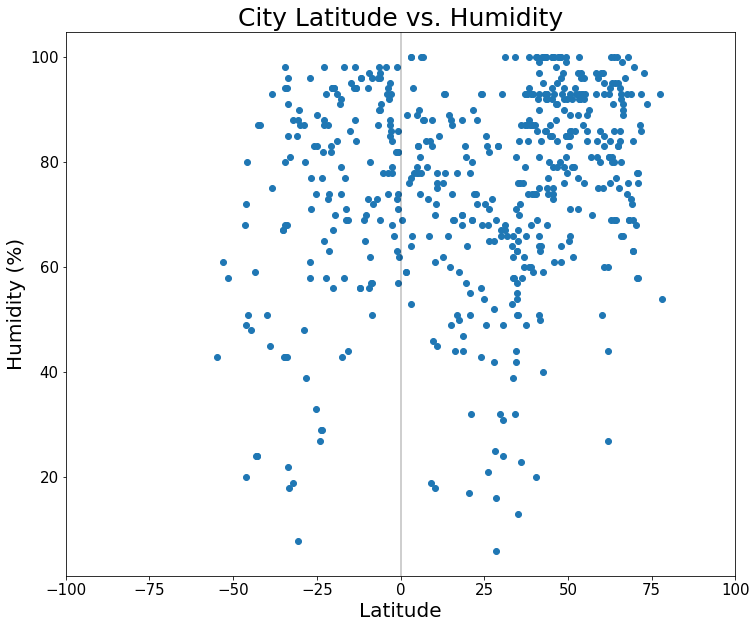

In [33]:
# create scatter plot

plt.title("City Latitude vs. Humidity", fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)
plt.axvline(0, color = 'black', alpha = .25, label='Equator')

plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker = "o")

plt.savefig("Latitude_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

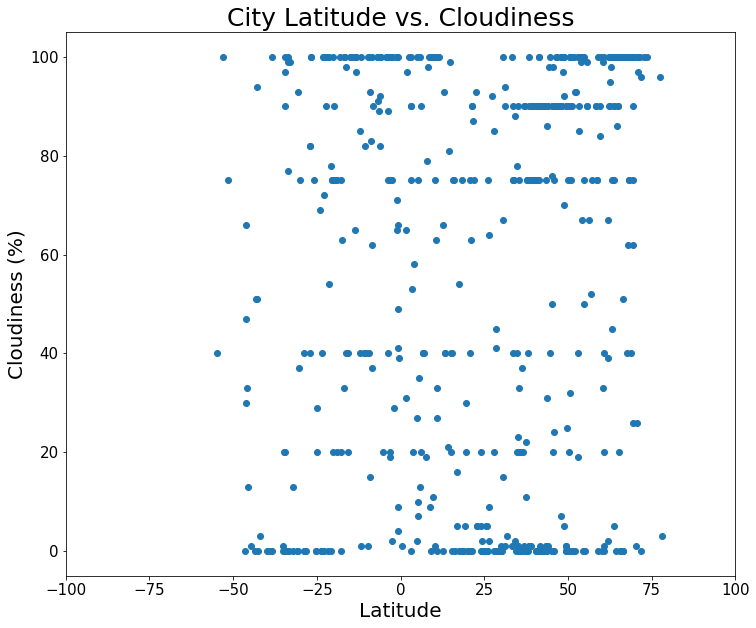

In [34]:
# create scatter plot

plt.title("City Latitude vs. Cloudiness", fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)


plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o")

plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

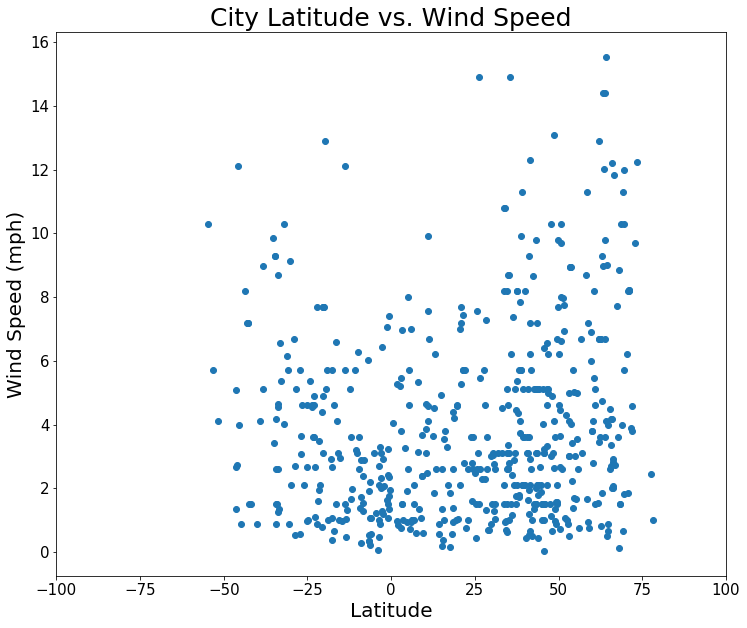

In [35]:
plt.title("City Latitude vs. Wind Speed", fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o")

plt.savefig("Latitude_vs_WindSpeed.png")

plt.show()